In [1]:
import pandas as pd

tweets = pd.read_csv("../Data/Tweet.csv")
company_tweet = pd.read_csv("../Data/Company_Tweet.csv")

In [2]:
print(company_tweet.shape)
print(tweets.shape)

(4336445, 2)
(3717964, 7)


In [3]:
tweets.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [4]:
company_tweet.head()

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL


In [7]:
# Convertir el campo post_date a formato datetime (si no está en ese formato ya)
tweets['post_date'] = pd.to_datetime(tweets['post_date'], unit='s')

# Realizar un "merge" por el tweet_id para unir ambos DataFrames
merged_df = pd.merge(company_tweet, tweets, on='tweet_id', how='inner')

# Ahora, seleccionamos las columnas que necesitas
final_df = merged_df[['post_date', 'ticker_symbol', 'writer', 'body', 'comment_num', 'retweet_num', 'like_num']]
# Guardar el DataFrame final a un archivo CSV
final_df.to_csv('../Data/tweet_data.csv', index=False)

final_df.head()

,post_date,ticker_symbol,writer,body,comment_num,retweet_num,like_num
0,2015-01-01 23:59:49,AAPL,SentiQuant,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
1,2015-01-01 23:59:48,AAPL,SentiQuant,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
2,2015-01-01 23:58:16,AAPL,MacHashNews,Rumor Roundup: What to expect when you're expe...,0,0,0
3,2015-01-01 23:57:13,AAPL,WaltLightShed,"An $AAPL store line in Sapporo Japan for the ""...",2,4,4
4,2015-01-01 23:56:48,AAPL,2waystrading,$AAPL - Will $AAPL Give Second entry opportuni...,0,0,0


In [8]:
# Ver los valores únicos de la columna 'ticker_symbol'
unique_tickers = final_df['ticker_symbol'].unique()

# Mostrar los tickers
print(unique_tickers)

['AAPL' 'GOOG' 'GOOGL' 'AMZN' 'MSFT' 'TSLA']


In [9]:
# Filtrar los tweets solo para AAPL
aapl_tweets_df = final_df[final_df['ticker_symbol'] == 'AAPL']

# Filtramos los tweets populares
aapl_best_tweets = aapl_tweets_df[aapl_tweets_df["like_num"] > 20]

print(aapl_best_tweets.shape)
aapl_best_tweets.describe()

(8695, 7)


,post_date,comment_num,retweet_num,like_num
count,8695,8695.000000,8695.000000,8695.000000
mean,2018-02-16 18:18:22.575503360,6.338125,29.787004,57.557907
min,2015-01-01 22:24:50,0.000000,0.000000,21.000000
25%,2017-03-04 22:56:51,1.000000,5.000000,26.000000
50%,2018-06-18 00:53:00,3.000000,14.000000,35.000000
75%,2019-02-05 01:13:59.500000,7.000000,31.000000,59.000000
max,2019-12-31 20:22:06,348.000000,999.000000,924.000000
std,NaN,11.589491,70.862233,71.332263


C:\Users\10644339\AppData\Local\Temp\ipykernel_16148\3352089821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_best_tweets['post_date'] = aapl_best_tweets['post_date'].dt.date


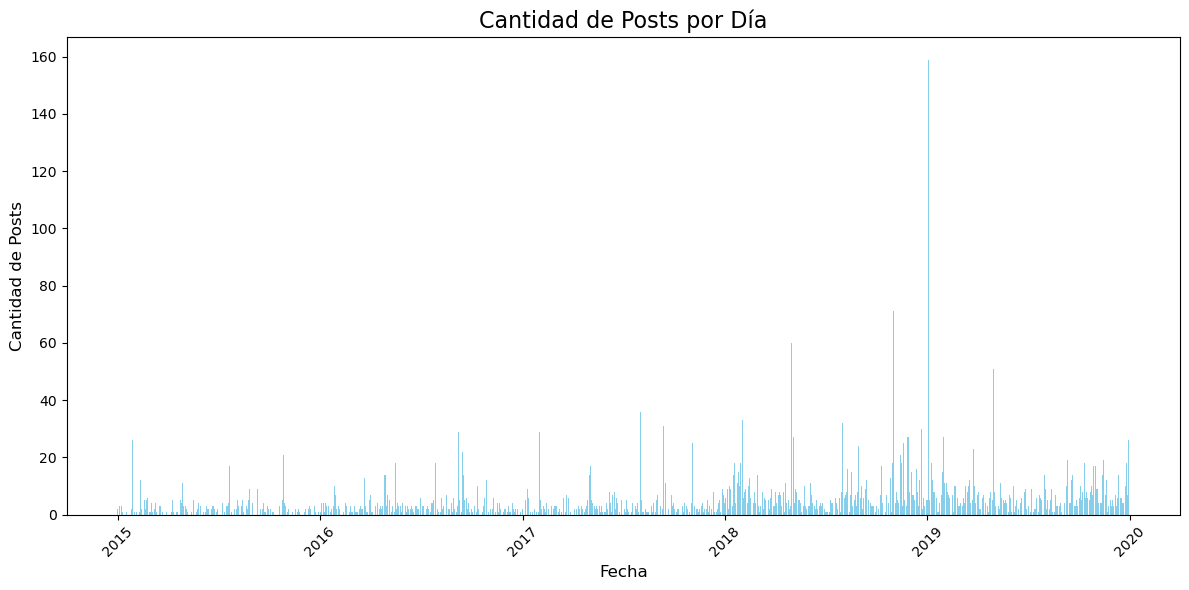

In [10]:
import matplotlib.pyplot as plt

# Crear una nueva columna solo con la fecha (sin la hora)
aapl_best_tweets['post_date'] = aapl_best_tweets['post_date'].dt.date

# Contar la cantidad de posts por día
posts_per_day = aapl_best_tweets['post_date'].value_counts().sort_index()

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.bar(posts_per_day.index, posts_per_day.values, color='skyblue')

# Configurar el gráfico
plt.title('Cantidad de Posts por Día', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cantidad de Posts', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [11]:
aapl_best_tweets = aapl_best_tweets.reset_index(drop=True)
aapl_best_tweets.to_csv("../Data/AAPL_Tweets.csv", index=False)
aapl_best_tweets.head()

,post_date,ticker_symbol,writer,body,comment_num,retweet_num,like_num
0,2015-01-01,AAPL,CNBC,This is Wall Street's top pick in 2015. Hint: ...,5,37,22
1,2015-01-01,AAPL,WSJ,"See how tech companies like Apple, Twitter and...",15,223,109
2,2015-01-02,AAPL,philstockworld,Trading Trends for 2015 from http://PhilStockW...,0,916,59
3,2015-01-04,AAPL,CNBC,This is Wall Street's top pick in 2015 (and it...,7,21,27
4,2015-01-04,AAPL,IBDinvestors,5 IBD 50 Stocks Poised For Strong '15 Earnings...,0,17,34


## Predicción de sentimiento

In [12]:
from transformers import pipeline, DistilBertTokenizer, DistilBertForSequenceClassification

# Ruta del mejor checkpoint (generalmente se encuentra en ./results/checkpoint-xxxx)
best_checkpoint = '../Sentiment_Model/TFM/results/checkpoint-5358'  # Reemplaza con el mejor checkpoint
# Tweets de prueba
tweets = aapl_best_tweets["body"].tolist()

# Cargar modelo y tokenizador desde el mejor checkpoint
best_checkpoint = '../Sentiment_Model/TFM/results/checkpoint-5358'  # Reemplaza con el mejor checkpoint
model = DistilBertForSequenceClassification.from_pretrained(best_checkpoint)
tokenizer = DistilBertTokenizer.from_pretrained(best_checkpoint)

# Crear pipeline
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer, device=0)

# Configurar tamaño de lote
batch_size = 64

# Función para procesar lotes
def predict_in_batches(tweets, batch_size):
    predictions = []
    for i in range(0, len(tweets), batch_size):
        batch = tweets[i:i+batch_size]
        batch_predictions = classifier(batch)
        predictions.extend(batch_predictions)
    return predictions

# Realizar predicciones en lotes
predictions = predict_in_batches(tweets, batch_size)


Device set to use cpu


In [16]:
# Agregar predicciones al DataFrame original
aapl_best_tweets["sentiment"] = [pred["label"] for pred in predictions]
aapl_best_tweets["sentiment_score"] = [pred["score"] for pred in predictions]

# Definir el mapeo
sentiment_mapping = {"LABEL_0": "Neutral", "LABEL_1": "Positive", "LABEL_2": "Negative"}

# Aplicar el mapeo en el DataFrame correcto
aapl_best_tweets["sentiment"] = aapl_best_tweets["sentiment"].map(sentiment_mapping)

# Verificar resultados
print(aapl_best_tweets["sentiment"].value_counts())
aapl_best_tweets

sentiment
Negative    3094
Positive    2951
Neutral     2650
Name: count, dtype: int64


,post_date,ticker_symbol,writer,body,comment_num,retweet_num,like_num,sentiment,sentiment_score
0,2015-01-01,AAPL,CNBC,This is Wall Street's top pick in 2015. Hint: ...,5,37,22,Negative,0.377143
1,2015-01-01,AAPL,WSJ,"See how tech companies like Apple, Twitter and...",15,223,109,Neutral,0.991951
2,2015-01-02,AAPL,philstockworld,Trading Trends for 2015 from http://PhilStockW...,0,916,59,Neutral,0.994979
3,2015-01-04,AAPL,CNBC,This is Wall Street's top pick in 2015 (and it...,7,21,27,Positive,0.618118
4,2015-01-04,AAPL,IBDinvestors,5 IBD 50 Stocks Poised For Strong '15 Earnings...,0,17,34,Positive,0.979329
...,...,...,...,...,...,...,...,...,...
8690,2019-12-31,AAPL,Investingcom,2019's Top-Performing Stocks On The S&P 500:1....,0,14,30,Neutral,0.882640
8691,2019-12-31,AAPL,Investingcom,2019's Top-Performing Stocks On The Dow:1. $AA...,0,18,32,Neutral,0.631119
8692,2019-12-31,AAPL,SJosephBurns,"Apple and Microsoft, which surged 85% and 55% ...",0,6,50,Positive,0.687902
8693,2019-12-31,AAPL,Investingcom,*The 20 largest stocks in 2010 vs. the 20 larg...,0,13,24,Positive,0.869122


In [17]:
aapl_best_tweets["sentiment_score"].describe()

count    8695.000000
mean        0.821891
std         0.170767
min         0.343634
25%         0.689507
50%         0.883646
75%         0.973778
max         0.999550
Name: sentiment_score, dtype: float64

In [18]:
aapl_best_tweets.to_csv("../Data/tweets_sentiment.csv")